In [1]:
!pip install psycopg2-binary
!pip install --upgrade 'sqlalchemy<2.0'
from sqlalchemy import create_engine

In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text


In [3]:

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

with engine.begin() as conn:
    query='''Select * from dash_visits'''
    dash_visits=pd.io.sql.read_sql(query, conn)

dash_visits.to_csv('dash_visits.csv',index=False)

In [4]:
query='''Select * from dash_visits'''
dash_visits=pd.io.sql.read_sql(query, con = engine) 

In [5]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [6]:
dash_visits.duplicated().sum()

0

In [7]:
dash_visits['record_id'].describe()

count    3.074500e+04
mean     1.055969e+06
std      8.875461e+03
min      1.040597e+06
25%      1.048283e+06
50%      1.055969e+06
75%      1.063655e+06
max      1.071341e+06
Name: record_id, dtype: float64

In [9]:
dash_visits['dt'].describe()

/var/folders/td/044ytqhx2db484lbkzj67nmw0000gp/T/ipykernel_63018/2972088052.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dash_visits['dt'].describe()


count                   30745
unique                     17
top       2019-09-24 18:58:00
freq                     3383
first     2019-09-24 18:28:00
last      2019-09-24 19:00:00
Name: dt, dtype: object

In [10]:
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

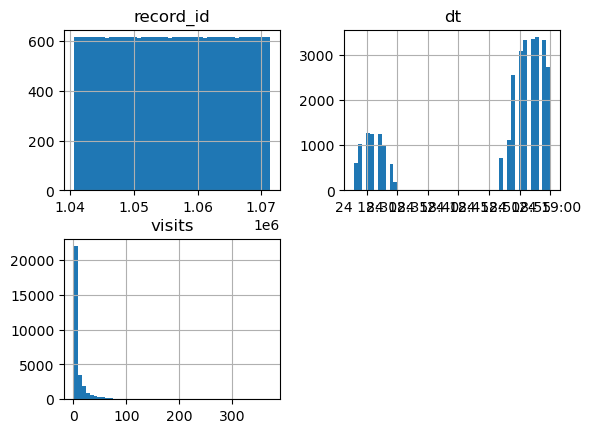

In [13]:
dash_visits.hist(bins=50);

Вывод по обработке данных:
    дублей нет,пропусков нет, типы данных определенны верно. Есть выбросы в данных по столбцу visits. 